# Video delivery dataset analysis

### Dataset Information

This dataset is measuring the data downloaded through **P2P** (peer to peer) and through the **CDN** (Content Delivery Network) by the viewers. 




### Content

Each data point has the following dimension, represented with 6 variables:

| Name | Description |
| -----| ----- | 
| #stream |  ID of each stream |
| isp |  Name of the Internet Service Provider |
| browser |  Browser name |
| connected |    Boolean value, true if the user is connected to the backend during his session |
| p2p | Data downloaded through P2P (peer to peer) |
| cdn | Data downloaded through CDN (Content Delivery Network) |


### Goal

The goal of this notebook is to explore the dataset and give recommendations as to where the service should be improved.

In [1]:
# importing Pandas library for data manipulation and analysis
import pandas as pd

In [2]:
# loading the dataset as df
df =  pd.read_csv("data.csv", index_col=0)

In [3]:
# printing the first 5 rows
df.head(5)

,isp,browser,connected,p2p,cdn
#stream,,,,,
1,Fro,Iron,True,195910.840977,109025.960619
1,Fro,EarthWolf,True,186711.522041,113744.856814
1,Arange,Iron,True,189428.293434,115944.246844
1,Arange,Iron,True,0.000000,307577.191067
1,BTP,EarthWolf,True,207246.640473,107010.608093


In [4]:
#trying to figure out the scope of the dataset and if there are NaN fields
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534954 entries, 1 to 9
Data columns (total 5 columns):
isp          534954 non-null object
browser      534954 non-null object
connected    534954 non-null bool
p2p          534954 non-null float64
cdn          534953 non-null float64
dtypes: bool(1), float64(2), object(2)
memory usage: 20.9+ MB


There is around 535K data points, separated into 9 streams

In [5]:
df.describe()

,p2p,cdn
count,5.349540e+05,5.349530e+05
mean,3.540061e+06,1.532365e+07
std,1.243739e+07,3.328645e+07
min,0.000000e+00,2.851538e+03
25%,0.000000e+00,7.726825e+04
50%,1.247840e+05,1.901855e+05
75%,1.941179e+05,2.071052e+05
max,5.249998e+07,1.049986e+08


Here, we can conclude several things:
* Data downloaded through CDN is never zero, at any point;
* Huge number of P2P data points are zero;
* The amount of the data sent through CDN is generally larger than the ones sent via P2P.

In [6]:
df.describe(include=['O'])

,isp,browser
count,534954,534954
unique,5,4
top,Arange,EarthWolf
freq,165341,283311


## There are 5 different ISPs and 4 different browsers, lets see which ones:

In [7]:
df.groupby('isp').count().sort_values(by='browser', ascending=False)

,browser,connected,p2p,cdn
isp,,,,
Arange,165341,165341,165341,165341
Fro,149789,149789,149789,149789
BTP,130317,130317,130317,130316
Datch Telecam,45655,45655,45655,45655
Olga,43852,43852,43852,43852


In [8]:
df.groupby('browser').count().sort_values(by='isp', ascending=False)

,isp,connected,p2p,cdn
browser,,,,
EarthWolf,283311,283311,283311,283310
Iron,217246,217246,217246,217246
Vectrice,20970,20970,20970,20970
Swamp,13427,13427,13427,13427


## Connection to the backend

**Conclusions:**
* about 9.2% of data points didn't manage to connect to backend;
* one ISP had the biggest issue with connection - Datch Telecam;
* one browser had slight problems with connection - Iron;
* when there was not a connection to the backend, there was no data sent over P2P network.

In [9]:
df.groupby('connected').count().sort_values(by='cdn', ascending=False)

,isp,browser,p2p,cdn
connected,,,,
True,485753,485753,485753,485752
False,49201,49201,49201,49201


In [10]:
df[['isp', 'connected']].groupby(['isp'], as_index=False).mean().sort_values(by='connected', ascending=False)

,isp,connected
1,BTP,0.998941
0,Arange,0.990075
3,Fro,0.949769
4,Olga,0.920574
2,Datch Telecam,0.202387


In [11]:
df[['browser', 'connected']].groupby(['browser'], as_index=False).mean().sort_values(by='connected', ascending=False)

,browser,connected
3,Vectrice,0.952742
0,EarthWolf,0.915019
2,Swamp,0.904074
1,Iron,0.894838


In [12]:
df[['cdn', 'connected']].groupby(['cdn'], as_index=False).mean().sort_values(by='connected', ascending=False)

,cdn,connected
0,2851.537913,True
346453,200182.485179,True
346470,200184.567932,True
346469,200184.496332,True
346468,200184.432209,True
346467,200184.176776,True
346465,200183.950577,True
346464,200183.919059,True
346462,200183.651942,True
346461,200183.627940,True


In [13]:
df[['p2p', 'connected']].groupby(['p2p'], as_index=False).mean().sort_values(by='connected', ascending=False)

,p2p,connected
172519,177660.551718,1.000000
230022,200433.732208,1.000000
230030,200435.943398,1.000000
230029,200435.472607,1.000000
230028,200435.191713,1.000000
230027,200435.180574,1.000000
230026,200434.888899,1.000000
230025,200434.752035,1.000000
230024,200434.468457,1.000000
230023,200434.442077,1.000000


## Plotting the dataset

Conclusions from this graph:

* There are almost half of the streams where there is little or no data streamed at all;
* In two streams the amount of data streamed via CDN and P2P is similar;
* There are two peaks (streams 4 and 8) where CDN data is about twice bigger compared to P2P;
* In two streams the amount of data streaned via CDN is highly dominant compared to P2P.

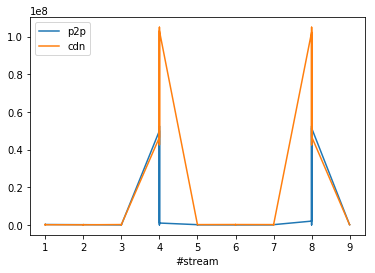

In [15]:
df.plot()

## Understanding ISP distribution

**Conclusions:**

* The majority of the data sent over CDN is realized via 3 ISPs;
* Almost all P2P data is sent via only one ISP - BTP;
* Datch Telecam is experiencing problems with connection to the backend.

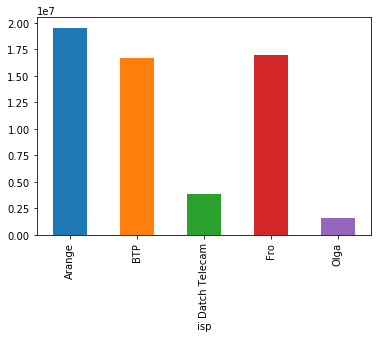

In [16]:
df.groupby("isp")['cdn'].mean().plot(kind='bar')

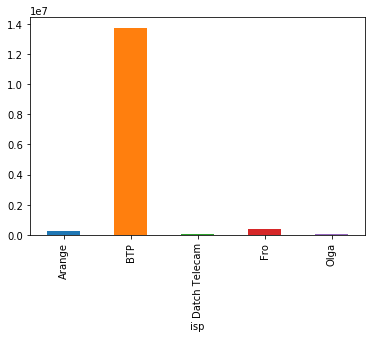

In [17]:
df.groupby("isp")['p2p'].mean().plot(kind='bar')

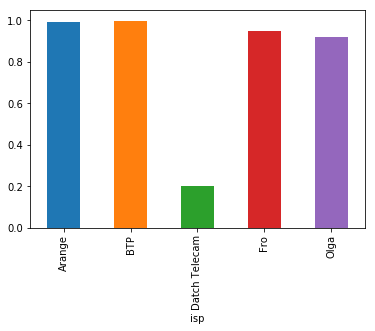

In [18]:
df.groupby("isp")['connected'].mean().plot(kind='bar')

## Understanding browser distribution

**Conclusions:**

* EarthWolf and Iron browsers have supported the majority of the CDN data;
* Almost no P2P data was sent over Vectrice, while also only little P2P data was sent over Swamp;
* Any browser in particular didn't have connection problems.

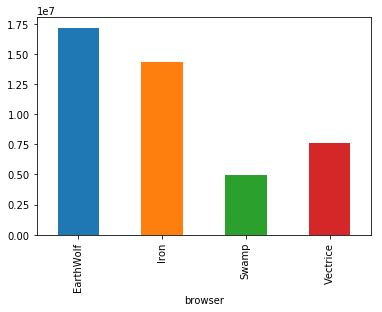

In [19]:
df.groupby("browser")['cdn'].mean().plot(kind='bar')

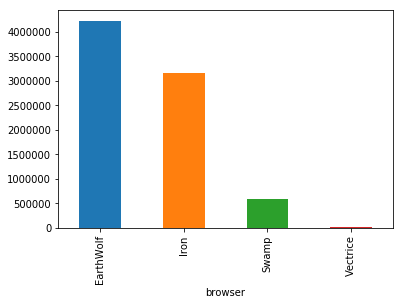

In [20]:
df.groupby("browser")['p2p'].mean().plot(kind='bar')

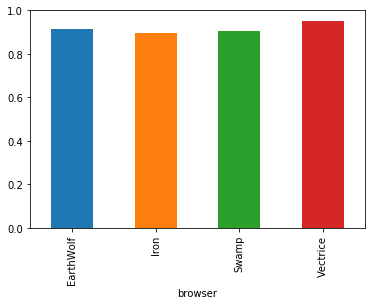

In [21]:
df.groupby("browser")['connected'].mean().plot(kind='bar')

## Overall comparison

### Let's see the combinations ISP - Browser:

**Conclusions:**

* ISP-s Olga and Datch Telecam generally handle less CDN data;
* The majority of CDN data is sent over browsers Iron and EarthWolf in combination with Arange, Fro and BTP ISPs;
* Almost all P2P data is sent over two (three) combinations:
    * Iron - BTP;
    * EarthWolf - Fro;
    * (Swamp - BTP).
* Four combinations are experiencing connection problems:
    * Iron - Olga;
    * EarthWolf - Olga;
    * Vectrice - Datch Telecam;
    * Swamp - Datch Telecam.

C:\Users\luka\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\luka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


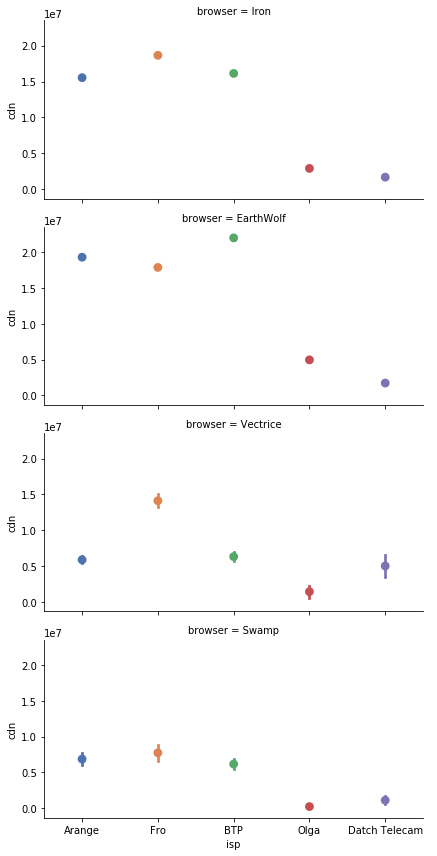

In [23]:
# visualization
import seaborn as sns

grid = sns.FacetGrid(df, row='browser', height=3, aspect=2)
grid.map(sns.pointplot, 'isp', 'cdn', palette='deep')
grid.add_legend()

C:\Users\luka\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\luka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


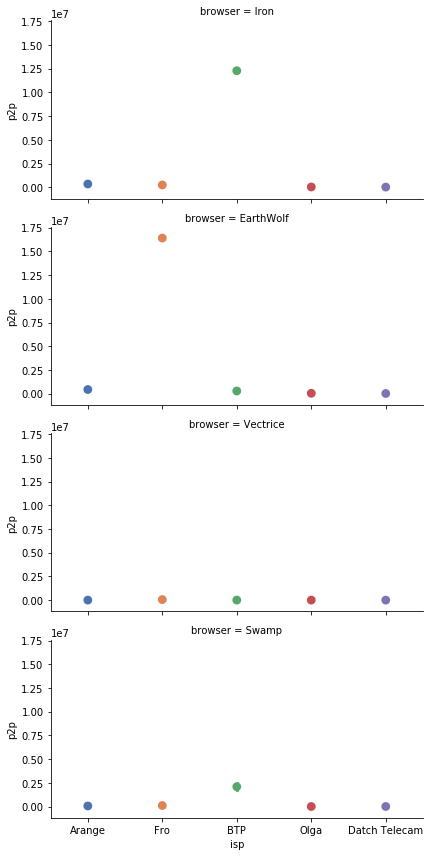

In [24]:
grid = sns.FacetGrid(df, row='browser', height=3, aspect=2)
grid.map(sns.pointplot, 'isp', 'p2p', palette='deep')
grid.add_legend()

C:\Users\luka\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\luka\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\luka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


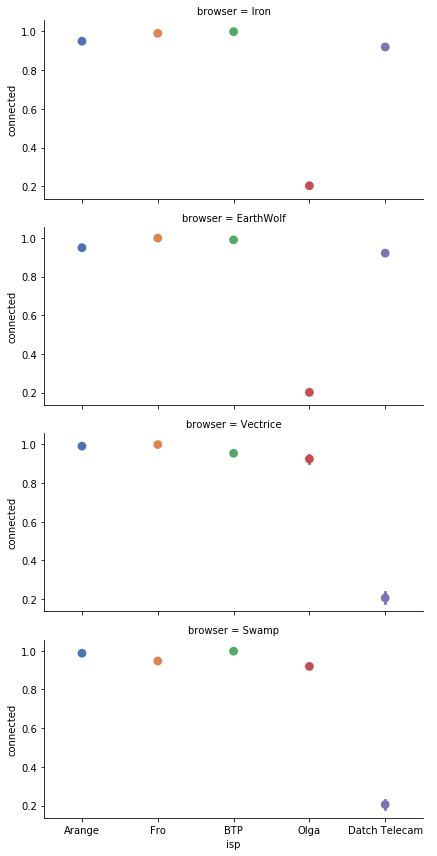

In [25]:
grid = sns.FacetGrid(df, row='browser', size=3, aspect=2)
grid.map(sns.pointplot, 'isp', 'connected', palette='deep')
grid.add_legend()

## Where the service should be improved:

**Conclusions:**

### CDN data

* EarthWolf and Iron browsers have supported the majority of the CDN data;
* The majority of the data sent over CDN is realized via 3 ISPs;
* _ISP-s Olga and Datch Telecam generally handle less CDN data;_
* The majority of CDN data is sent over browsers Iron and EarthWolf in combination with Arange, Fro and BTP ISPs;


### P2P data

* _Almost all P2P data is sent via only one ISP - BTP._
* **Speaking of browsers, almost no P2P data was sent over Vectrice, while also very little P2P data was sent over Swamp;**
* Almost all P2P data is sent over two (three) combinations:
    * Iron - BTP;
    * EarthWolf - Fro;
    * (Swamp - BTP).


### Connection to backend

* _About 9.2% of all data points didn't manage to connect to backend;_
* **Four ISP - browser combinations are experiencing connection problems:**
    * Iron - Olga;
    * EarthWolf - Olga;
    * Vectrice - Datch Telecam;
    * Swamp - Datch Telecam.    

While any browser in particular didn't have connection problems (except Iron), **_one ISP had the biggest issue with connection - Datch Telecam;_**